In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.transforms import transforms
from PIL import Image

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

# Load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)

# Load the test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Create directories to store the PNG images
output_dir_train = './cifar10_png/train'
output_dir_test = './cifar10_png/test'
os.makedirs(output_dir_train, exist_ok=True)
os.makedirs(output_dir_test, exist_ok=True)

# Define class names for better organization (optional)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Save training images
print("Saving training images...")
for i, (image_tensor, label) in enumerate(trainset):
# Convert tensor to PIL Image
    image_pil = transforms.ToPILImage()(image_tensor)
    class_name = classes[label]
    class_dir = os.path.join(output_dir_train, class_name)
    os.makedirs(class_dir, exist_ok=True)
    image_pil.save(os.path.join(class_dir, f'image_{i:05d}.png'))

# Save test images
print("Saving test images...")
for i, (image_tensor, label) in enumerate(testset):
    # Convert tensor to PIL Image
    image_pil = transforms.ToPILImage()(image_tensor)
    class_name = classes[label]
    class_dir = os.path.join(output_dir_test, class_name)
    os.makedirs(class_dir, exist_ok=True)
    image_pil.save(os.path.join(class_dir, f'image_{i:05d}.png'))

print("CIFAR-10 images saved as PNG files.")

In [4]:
data_dir = './cifar10_png'
print(os.listdir(data_dir))

['models', 'test', 'train']


In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [6]:
dataset = ImageFolder(data_dir+"/train",transform=ToTensor())

In [7]:
img,label = dataset[0]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.6431, 0.4118, 0.4627,  ..., 0.4275, 0.4235, 0.3569],
         [0.6549, 0.4549, 0.2824,  ..., 0.4118, 0.4118, 0.3490],
         [0.5490, 0.5569, 0.4667,  ..., 0.4078, 0.3294, 0.3059],
         ...,
         [0.5451, 0.5569, 0.5294,  ..., 0.3490, 0.3804, 0.4941],
         [0.6392, 0.6000, 0.5725,  ..., 0.3333, 0.3843, 0.4980],
         [0.7176, 0.6902, 0.6039,  ..., 0.3686, 0.3569, 0.4784]],

        [[0.8078, 0.5490, 0.5804,  ..., 0.5765, 0.5765, 0.5059],
         [0.8353, 0.6275, 0.4275,  ..., 0.5569, 0.5569, 0.4980],
         [0.7490, 0.7569, 0.6392,  ..., 0.5451, 0.4706, 0.4510],
         ...,
         [0.5804, 0.6078, 0.6118,  ..., 0.5255, 0.5804, 0.6902],
         [0.6157, 0.6431, 0.6431,  ..., 0.5098, 0.5804, 0.6980],
         [0.6000, 0.7137, 0.6039,  ..., 0.5255, 0.5216, 0.6667]],

        [[0.3294, 0.2392, 0.3961,  ..., 0.2863, 0.2706, 0.2235],
         [0.3294, 0.1922, 0.1686,  ..., 0.3098, 0.2824, 0.2235],
         [0.2549, 0.2588, 0.3098,  ..., 0.3294, 0.2275, 0.

In [8]:
print(dataset.classes)

['bird', 'car', 'cat', 'deer', 'dog', 'frog', 'horse', 'plane', 'ship', 'truck']


In [12]:
import matplotlib.pyplot as plt
def show_example(img,label):
    print("label:", dataset.classes[label] ,"("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

label: bird (0)


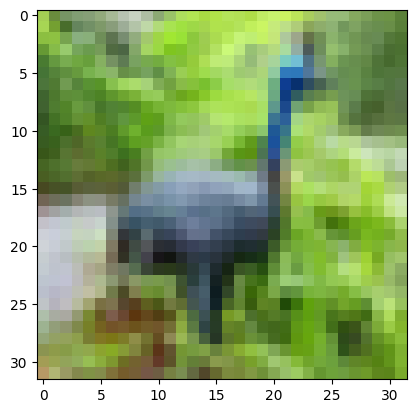

In [13]:
show_example(*dataset[0])

In [14]:
import numpy as np

def split_indices(n,val_pct=0.1,seed=99):
    #Determine size of validation set
    n_val = int(val_pct*n)
    #Set the random seed(for reproducibility)
    np.random.seed(seed)
    #Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    #pick first n_val indices for validation set
    return idxs[n_val:],idxs[:n_val]

In [15]:
val_pct = 0.2
rand_seed = 42
train_indices,val_indices = split_indices(len(dataset),val_pct,rand_seed)
print(len(train_indices),len(val_indices))

40000 10000


In [16]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [17]:
batch_size = 100

In [18]:
#Training Sampler Data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,batch_size,sampler=train_sampler)
#Validation Sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,batch_size,sampler=val_sampler)

In [19]:
from torchvision.utils import make_grid

In [20]:
def show_batch(dl):
    for images,label in dl:
        fig,ax = plt.subplots(figsize = (10,10))
        ax.set_xticks([]);ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break

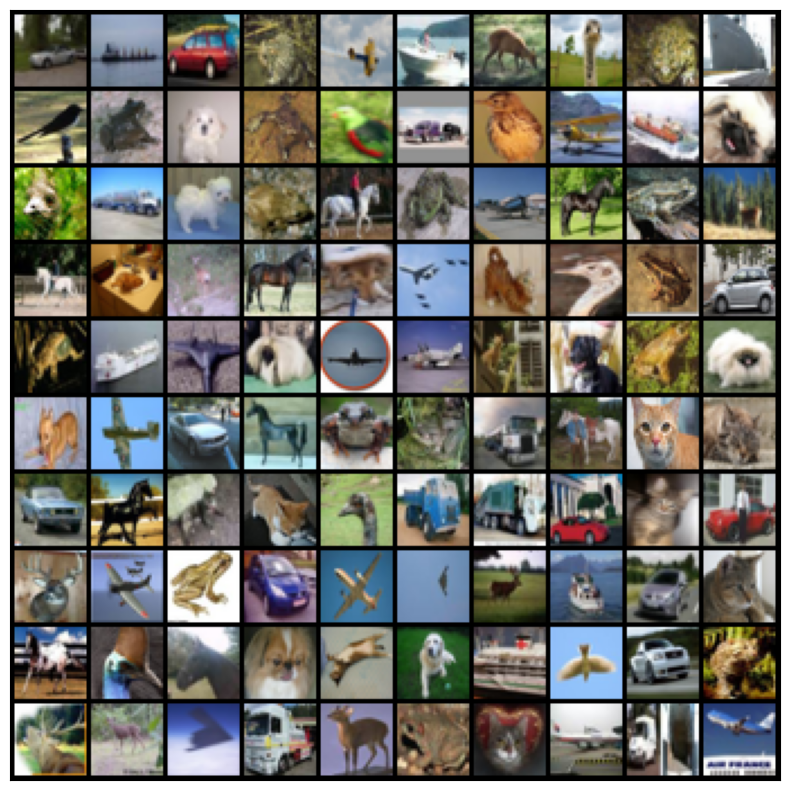

In [21]:
show_batch(train_dl)

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
simple_model = nn.Sequential(nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),nn.MaxPool2d(2,2))


In [24]:
for images,labels in train_dl:
    print('images.shape:',images.shape)
    out = simple_model(images)
    print("out.shape:",out.shape)
    break

images.shape: torch.Size([100, 3, 32, 32])
out.shape: torch.Size([100, 8, 16, 16])


In [25]:
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #bsx16x16x16

    nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),#bsx16x8x8
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),#bsx16x4x4

    nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),#bsx16x2x2
    nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),#bsx16x1x1

    nn.Flatten(),#bsx16
    nn.Linear(256,10)#bsx10
)

In [26]:
torch.cuda.is_available()

True

In [27]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [28]:
device = get_default_device()
device

device(type='cuda')

In [29]:
def to_device(data,device):
    #Move tensors to chosen device
    if isinstance(data,(list,tuple)):
        return [to_device(x,device)for x in data]
    return data.to(device,non_blocking=True) 

In [30]:
class DeviceDataLoader():
    #Wrap dataloader to move data to a device
    def __init__(self,dl,device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        #Yield batch of data after moving it to device
        for b in self.dl:
            yield to_device(b,self.device)

    def __len__(self):
        #Number of batches
        return len(self.dl)

In [31]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(train_dl,device)
to_device(model,device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=256, out_features=10, bias=True)
)

In [32]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    #generate predictions
    preds = model(xb)
    #Calculate loss
    loss = loss_func(preds,yb)

    if opt is not None:
        #Comput gradients
        loss.backward()
        #update parameters
        opt.step()
        #reset gradient
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        #compute metric
        metric_result = metric(preds,yb)

    return loss.item(),len(xb),metric_result

In [33]:
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        #pass each batch through model
        result = [loss_batch(model,loss_fn,xb,yb,metric=metric)for xb,yb in valid_dl]
        #separate losses,counts and metrics
        losses,nums,metrics = zip(*result)
        #Total size of the dataset
        total = np.sum(nums)
        #Avg loss across batches 
        avg_loss = np.sum(np.multiply(losses,nums))/total
        avg_metric = None
        if metric is not None:
            #Avg metric across batches
            avg_metric = np.sum(np.multiply(metrics,nums))/total
    return avg_loss,total,avg_metric

In [34]:
def fit(epochs,lr,model,loss_fn,train_dl,valid_dl,metric=None,opt_fn=None):
    train_losses,val_losses,val_metrics=[],[],[]
    #instantiate the optimizer
    if opt_fn is None:opt_fn = torch.optim.SGD
    opt = opt_fn(model.parameters(),lr=lr)
    for epoch in range(epochs):
        #training
        total_train_loss = 0
        for xb,yb in train_dl:
            train_loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
            total_train_loss+=train_loss

        # Calculate average training loss
        avg_train_loss = total_train_loss / len(train_dl)
        
        #Evaluation
        result = evaluate(model,loss_fn,valid_dl,metric)
        val_loss,total,val_metric=result

        #Record the loss & metric
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)

        #Print progress
        if metric is not None:
            print('Epoch [{}/{}], Train Loss:{:.4f}, Val Loss:{:.4f}, Val {}:{:.4f}'.format(
                epoch+1, epochs, avg_train_loss, val_loss, metric.__name__, val_metric
            ))
        else:
            print('Epoch [{}/{}], Val Loss:{:.4f}'.format(epoch+1, epochs, val_loss))
    return train_losses,val_losses,val_metrics

In [35]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [36]:
epochs = 15
opt_func = torch.optim.SGD
lr = 0.05

In [37]:
val_loss,_,val_acc = evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)
print("Loss:{:.4f},Accuracy:{:.4f}".format(val_loss,val_acc))

Loss:2.3030,Accuracy:0.1012


In [ ]:
history = fit(epochs, lr,model, F.cross_entropy, train_dl, valid_dl, accuracy,opt_func)
train_losses,val_losses,val_metrics = history 

In [38]:
import matplotlib.pyplot as plt
accuracies = [val_acc]+val_metrics
plt.plot(accuracies,"-x")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy vs No. of epoch')

NameError: name 'val_metrics' is not defined

In [ ]:
def plot_losses(train_losses,val_losses):
    plt.plot(train_losses,'-x')
    plt.plot(val_losses,'-o')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training','Validation'])
    plt.title("Loss vs Epoch")

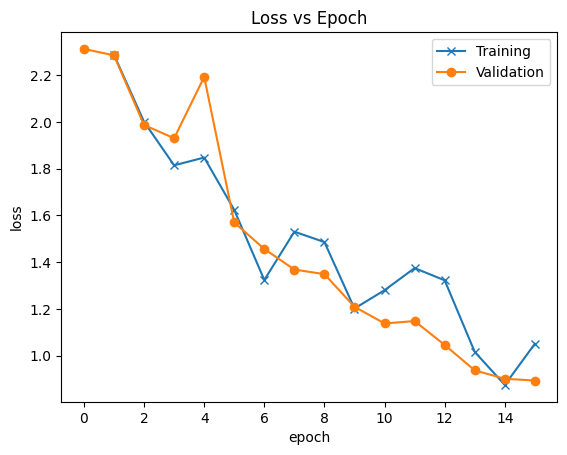

In [ ]:
plot_losses([None]+train_losses,[val_loss]+val_losses)

In [ ]:
test_dataset = ImageFolder(data_dir+'/test',transform=ToTensor())

In [ ]:
def predict_image(img,model):
    #Convert to a batch of 1
    xb = img.unsqueeze(0)
    #Get predictions from model
    yb = model(xb.to(device))
    #Pick index with highest probability
    _,preds = torch.max(yb,dim=1)
    #Retrieve the class model
    return dataset.classes[preds[0].item()]

Label: bird ,Predicted: deer


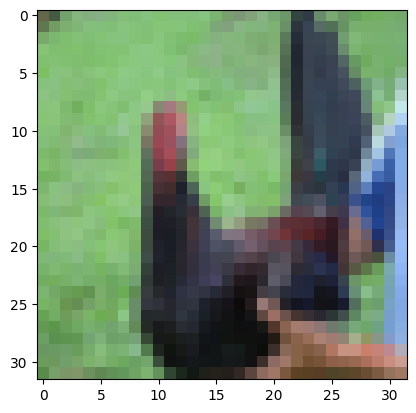

In [ ]:
img,label = test_dataset[0]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label],",Predicted:",predict_image(img,model))

Label: car ,Predicted: car


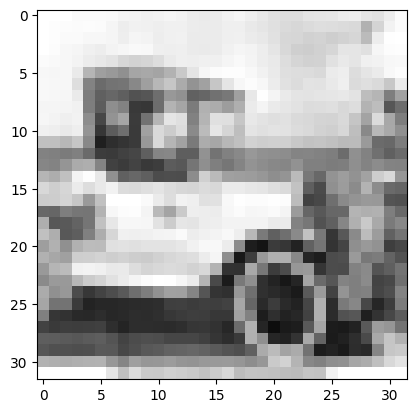

In [ ]:
img,label = test_dataset[1002]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label],",Predicted:",predict_image(img,model))

Label: cat ,Predicted: cat


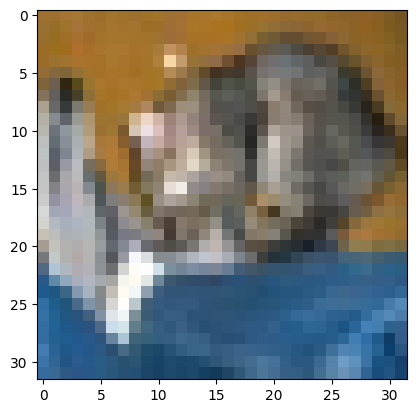

In [ ]:
img,label = test_dataset[2000]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label],",Predicted:",predict_image(img,model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset,batch_size),device)

test_loss,_,test_acc = evaluate(model,F.cross_entropy,test_loader,metric=accuracy)
print('Loss:{:.4f},Accuracy:{:.4f}'.format(test_loss,test_acc))

Loss:1.0929,Accuracy:0.6144


In [ ]:
torch.save(model.state_dict(),'cifar10-cnn.pth')